<a href="https://colab.research.google.com/github/Nayanashaji234/Datascience-NLP/blob/master/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This project focuses on developing an emotion-based chatbot capable of interpreting and responding to user emotions effectively. The chatbot utilizes machine learning algorithms to analyze textual data and classify it into various emotional categories such as happiness, sadness, anger, and more. By incorporating NLP techniques, this project aims to enhance human-computer interaction by making it more empathetic and intuitive.

Text: Contains written expressions, possibly describing thoughts or feelings related to anxiety and depression.


Label: Numerical values (e.g., 1.0), which might indicate categories or the presence/absence of anxiety or depression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datascience/Machine learning/NLP/students anxiety and depression.xlsx')

In [ ]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [ ]:
df.shape

(6982, 2)

In [ ]:
df.size

13964

In [ ]:
df.isnull().any()

,0
text,True
label,True


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
text=df['text']

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:

text1=[]

In [ ]:
import re

In [ ]:
for txt in text:
    # Convert txt to string before applying re.sub
    txt = str(txt)
    txt = re.sub(r'\n', ' ', txt)  # Replace newline characters with space
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)  # Remove punctuation and numbers
    text1.append(txt)  # Append the cleaned text to text1

In [ ]:
text1

['oh my gosh',
 'trouble sleeping confused mind restless heart All out of tune',
 'All wrong back off dear forward doubt Stay in a restless and restless place',
 'Ive shifted my focus to something else but Im still worried',
 'Im restless and restless its been a month now boy What do you mean',
 'every break you must be nervous like something is wrong but what the heck',
 'I feel scared anxious what can I do And may my family or us be protected ',
 'Have you ever felt nervous but didnt know why',
 'I havent slept well for  days its like Im restless why huh ',
 'Im really worried I want to cry',
 'always restless every night even though I dont know why whats wrong strange',
 'Im confused Im not feeling good lately Every time I want to sleep I always feel restless',
 'sometimes what is needed when there is a problem is to laugh until you forget that there is a problem when you remember it you feel restless like that well it turns out that I still have a sad burden blah blah blah',
 'Beca

In [ ]:
text=pd.Series(text1)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# remove sent havind 3 words

from nltk.tokenize import word_tokenize
text = text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(x)>=3]))

In [ ]:
text

,0
0,oh my gosh
1,trouble sleeping confused mind restless heart ...
2,All wrong back off dear forward doubt Stay in ...
3,Ive shifted my focus to something else but Im ...
4,Im restless and restless its been a month now ...
...,...
6888,I cant forget you SpiritHadrian
6889,DJ DAIKI DJ DAIKI DJ DAIKIDJ DAIKI DJ DAIKIHey...
6890,Daiy
6891,tired of clowns but still hopefully tonight if...


In [ ]:
# lowecase conversion and normalization (convert in to root form or cut the tail part)

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x:' '.join([stemmer.stem(w.lower()) for w in word_tokenize(x)]))

In [ ]:

text

,0
0,oh my gosh
1,troubl sleep confus mind restless heart all ou...
2,all wrong back off dear forward doubt stay in ...
3,ive shift my focus to someth els but im still ...
4,im restless and restless it been a month now b...
...,...
6888,i cant forget you spirithadrian
6889,dj daiki dj daiki dj daikidj daiki dj daikihey...
6890,daiy
6891,tire of clown but still hope tonight if not to...


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,oh gosh
1,troubl sleep confus mind restless heart tune
2,wrong back dear forward doubt stay restless re...
3,ive shift focus someth els im still worri
4,im restless restless month boy mean
...,...
6888,cant forget spirithadrian
6889,dj daiki dj daiki dj daikidj daiki dj daikihey...
6890,daiy
6891,tire clown still hope tonight tomorrow mas tm ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data_vec = vec.fit_transform(text)

In [ ]:
print(train_data_vec)

  (0, 5848)	0.5813545674631834
  (0, 3169)	0.8136503345354777
  (1, 8399)	0.46160759359452747
  (1, 7546)	0.2921814296976366
  (1, 1660)	0.3378944462011551
  (1, 5251)	0.37552539420859715
  (1, 6887)	0.24738768679323722
  (1, 3449)	0.29854556993812065
  (1, 8444)	0.544083025190109
  (2, 6887)	0.43136685977866585
  (2, 9031)	0.2877664566397568
  (2, 686)	0.2763345265299523
  (2, 1926)	0.36038759908715007
  (2, 2869)	0.39087550325996695
  (2, 2244)	0.3859318599245876
  (2, 7777)	0.3244347507487332
  (2, 6294)	0.3433484229501892
  (3, 4027)	0.3125137101912538
  (3, 7388)	0.5085469659740784
  (3, 2824)	0.42513636290805257
  (3, 7630)	0.3476487052636497
  (3, 2431)	0.3959243132572797
  (3, 3817)	0.1976202962239975
  (3, 7791)	0.26320956378936006
  (3, 9003)	0.2775346775175725
  :	:
  (6887, 8476)	0.43986463285890187
  (6888, 2855)	0.4977387876259642
  (6888, 1299)	0.38298769442100183
  (6888, 7712)	0.7781879755012414
  (6889, 2173)	0.769800358919501
  (6889, 1864)	0.5773502691896258
  (6889

In [ ]:
train_data_vec.shape

(6893, 9301)

In [ ]:
type(train_data_vec)

scipy.sparse._csr.csr_matrix

In [ ]:
y = df['label'].values

In [ ]:

y

array([1., 1., 1., ..., 0., 0., 0.])

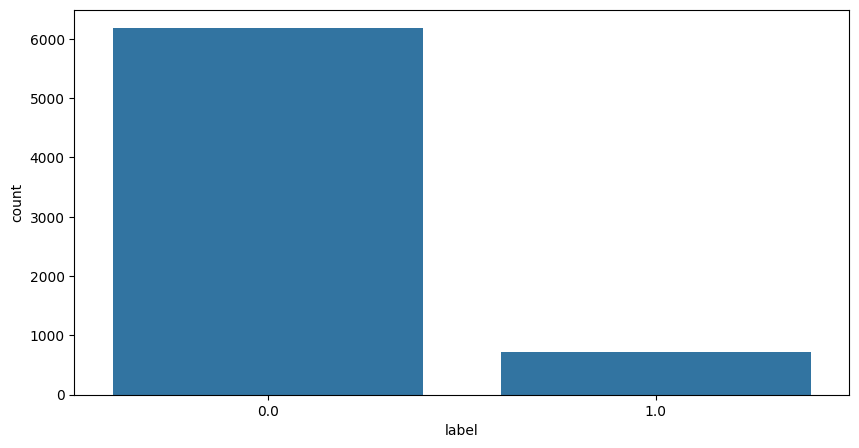

In [ ]:
#bar chart

plt.figure(figsize=(10,5))
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts())
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# percentage distribution of label

df['label'].value_counts(normalize=True)*100

,proportion
label,
0.0,89.67068
1.0,10.32932


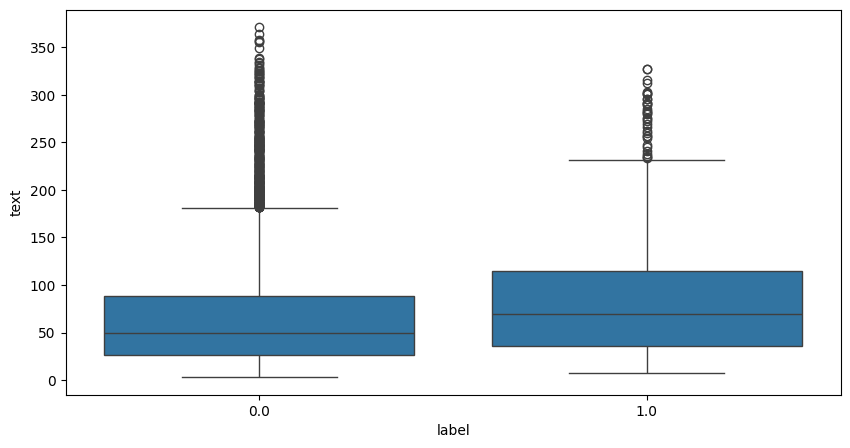

In [ ]:
#Box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['label'],y=df['text'].str.len())
plt.show()

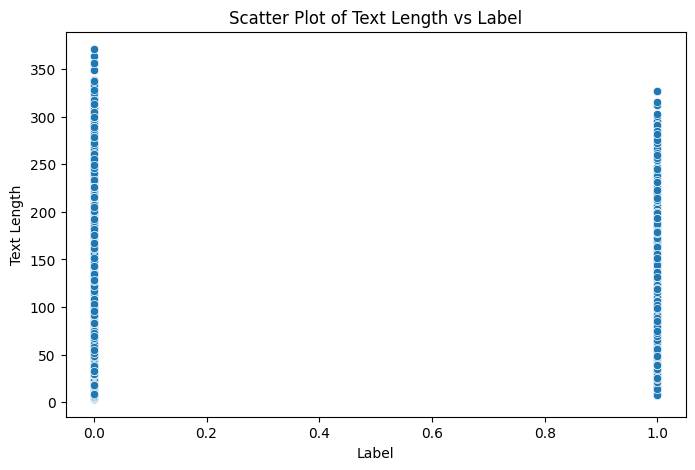

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['label'], y=df['text'].str.len())
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.title('Scatter Plot of Text Length vs Label')
plt.show()

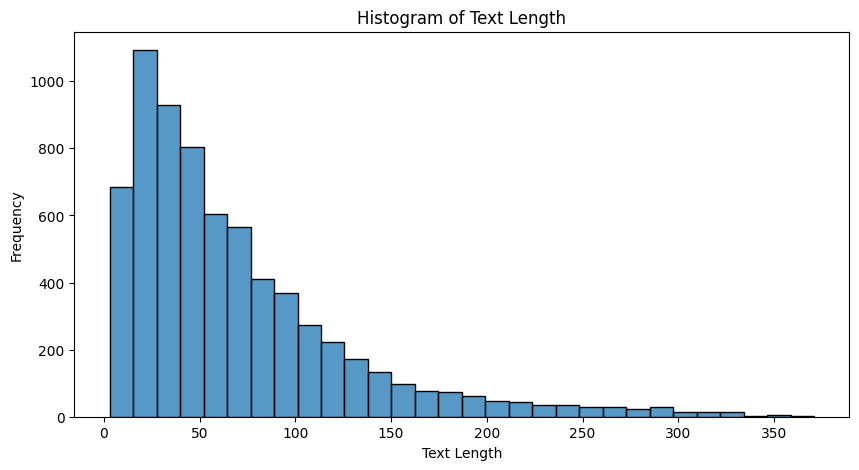

In [ ]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['text'].str.len(), bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()

<ipython-input-107-ed7aa890526f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['text'], y=df['label'], ci=None)


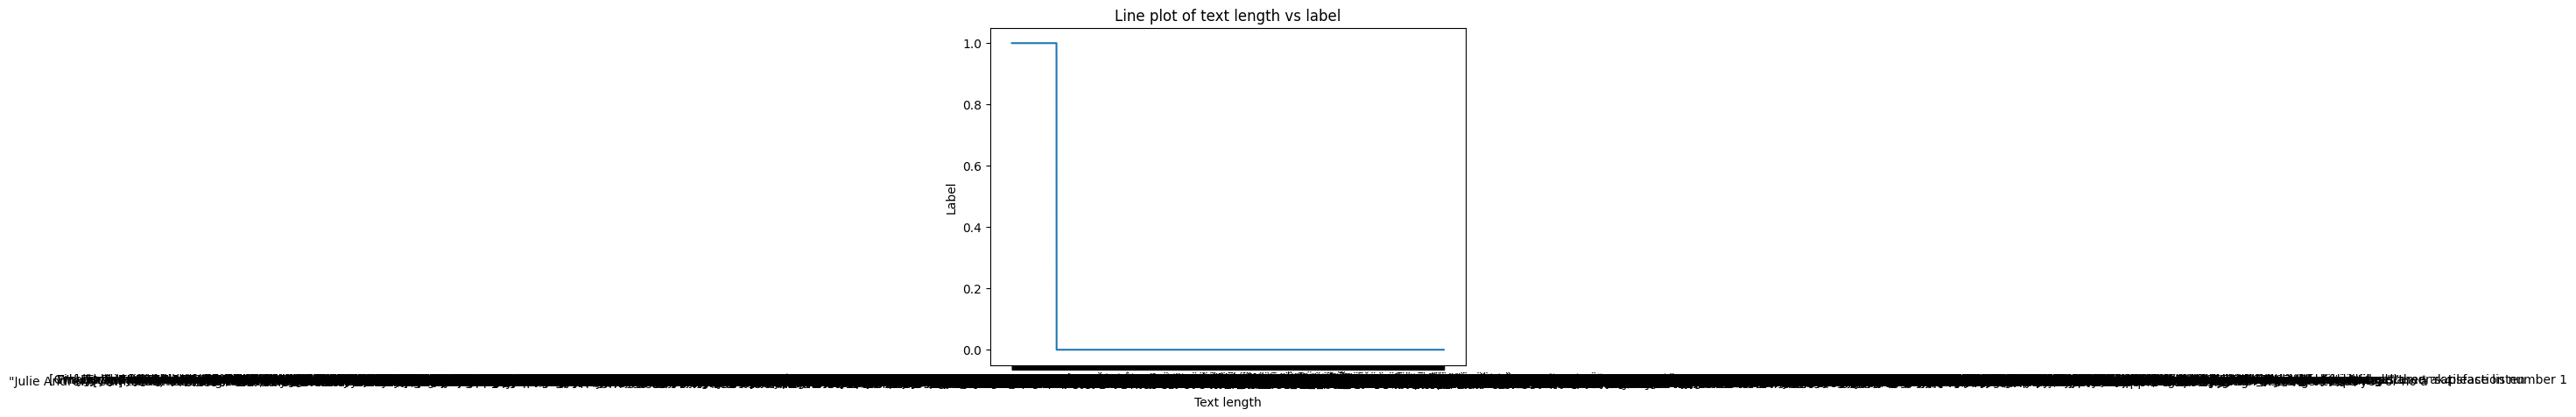

In [ ]:
plt.figure(figsize=(7, 5))
sns.lineplot(x=df['text'], y=df['label'], ci=None)
plt.title("Line plot of text length vs label")
plt.xlabel("Text length")
plt.ylabel("Label")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


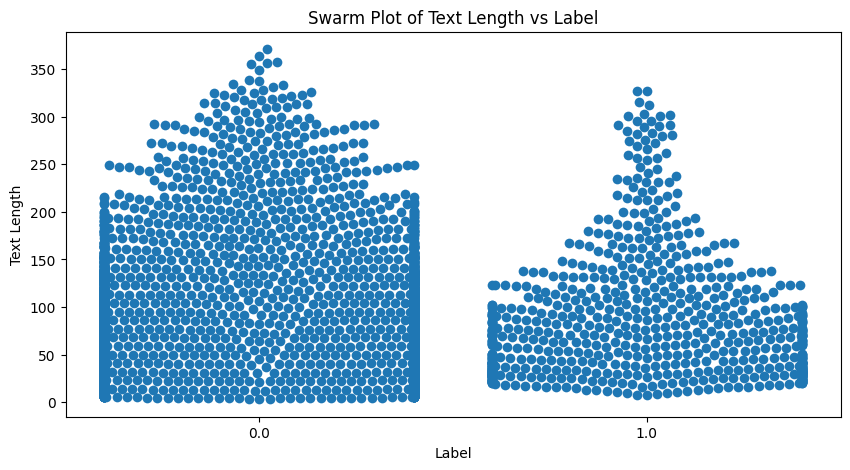

In [ ]:
# Swarmplot
plt.figure(figsize=(10, 5))
sns.swarmplot(x=df['label'], y=df['text'].str.len(), size=7)
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.title('Swarm Plot of Text Length vs Label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_vec,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train : ", (x_train.shape))
print("x_test : ", {x_test.shape})
print("y_train : ", {y_train.shape})
print("y_test : ", {y_test.shape})

x_train :  (5514, 9301)
x_test :  {(1379, 9301)}
y_train :  {(5514,)}
y_test :  {(1379,)}


In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
x_train_vec = x_train
x_test_vec = x_test

In [ ]:
#scaling x_train and x_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_vec.toarray()) # Convert to dense array if necessary
x_test_scaled = scaler.transform(x_test_vec.toarray())

In [ ]:
# saving the scaler model
import pickle
pickle.dump(scaler,open('Scalermod.pkl','wb'))

MODEL EVALUATION

Logistic regression()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9637418419144308

In [ ]:
x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test,x_test_pred)
test_accuracy

0.9637418419144308

In [ ]:
text='trouble sleeping confused mind restless heart All out of tune'

In [ ]:
import numpy as np

In [ ]:
model.predict(vec.transform(np.array([text])))

array([1.])

MultinomialNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8984771573604061

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

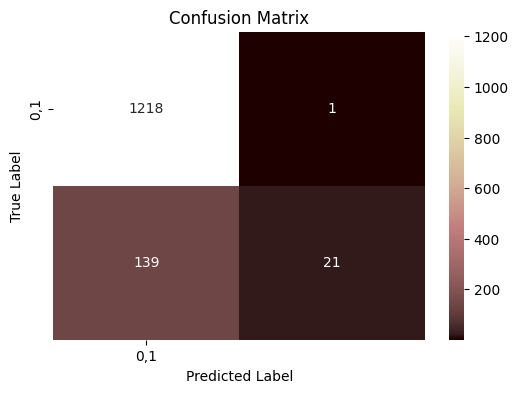

In [ ]:
#Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink", xticklabels=['0,1'], yticklabels=['0,1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8984771573604061


In [ ]:
# New prediction
sample = "CIts really easy to enter the afternoon of the trip"


In [ ]:
print("The result of sample message :  " ,model.predict(vec.transform([sample])))

The result of sample message :   [0.]


#Conclusion

In this project, we successfully implemented an emotion-based chatbot leveraging NLP and machine learning techniques. The chatbot demonstrated its ability to accurately interpret user emotions from textual inputs and provide appropriate responses, showcasing the potential of NLP in enhancing interactive systems. Through this project, we gained valuable insights into the challenges of emotion classification and the importance of refining algorithms for improved accuracy and reliability.